In [1]:
# Business Problem

# We are a pharmaceutical distributor aiming to maximize profit by allocating limited marketing budget or sales effort
# across different drug categories. Each category has an assumed profit per unit.
# Our goal is to decide how much effort to assign to each category to achieve maximum profit, ensuring diversification.

In [3]:
# Importing Libraries

import pandas as pd
import matplotlib.pyplot as plt
from pulp import LpProblem, LpVariable, LpMaximize, lpSum, value


In [5]:
# Load Dataset
df = pd.read_csv("C:\\Users\\ASUS\\Downloads\\salesmonthly.csv")

# View first few rows
df.head()

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06
0,2014-01-31,127.69,99.090,152.100,878.030,354.0,50.0,112.0,48.2
1,2014-02-28,133.32,126.050,177.000,1001.900,347.0,31.0,122.0,36.2
2,2014-03-31,137.44,92.950,147.655,779.275,232.0,20.0,112.0,85.4
3,2014-04-30,113.10,89.475,130.900,698.500,209.0,18.0,97.0,73.7
4,2014-05-31,101.79,119.933,132.100,628.780,270.0,23.0,107.0,123.7


In [7]:
# Columns and profit margins

categories = ['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06']

profit_margins = {
    'M01AB': 12,
    'M01AE': 10,
    'N02BA': 15,
    'N02BE': 8,
    'N05B': 20,
    'N05C': 18,
    'R03': 14,
    'R06': 9
}

# Calculate total sales per category (just for reference)

total_sales = df[categories].sum()
total_sales

M01AB    10499.440
M01AE     8156.000
N02BA     8051.459
N02BE    62477.945
N05B     18348.300
N05C      1249.000
R03      11737.250
R06       6066.380
dtype: float64

In [9]:
# Define optimization model
model = LpProblem("Maximize_Total_Profit", LpMaximize)

# Decision variables
effort_vars = {cat: LpVariable(cat, lowBound=0) for cat in categories}

# Objective function
model += lpSum([profit_margins[cat] * effort_vars[cat] for cat in categories])

In [11]:
# Total budget constraint

total_budget = 500
model += lpSum([effort_vars[cat] for cat in categories]) <= total_budget

In [13]:
# Add diversification constraints: min 20, max 100 per category

for cat in categories:
    model += effort_vars[cat] >= 20
    model += effort_vars[cat] <= 100
    
# Solve
model.solve()

1

In [15]:
# Print results

print("Status:", model.status)
print("\nOptimal Allocation per Category:")
for cat in categories:
    print(f"{cat}: {effort_vars[cat].varValue:.2f}")

print("\nTotal Expected Profit: $", value(model.objective))

Status: 1

Optimal Allocation per Category:
M01AB: 40.00
M01AE: 20.00
N02BA: 100.00
N02BE: 20.00
N05B: 100.00
N05C: 100.00
R03: 100.00
R06: 20.00

Total Expected Profit: $ 7720.0


In [17]:
# Insights

results_df = pd.DataFrame({
    'Category': categories,
    'Effort_Allocated': [effort_vars[cat].varValue for cat in categories],
    'Profit_Per_Unit': [profit_margins[cat] for cat in categories],
    'Total_Profit': [profit_margins[cat] * effort_vars[cat].varValue for cat in categories]
})

results_df.sort_values(by="Total_Profit", ascending=False)

,Category,Effort_Allocated,Profit_Per_Unit,Total_Profit
4,N05B,100.0,20,2000.0
5,N05C,100.0,18,1800.0
2,N02BA,100.0,15,1500.0
6,R03,100.0,14,1400.0
0,M01AB,40.0,12,480.0
1,M01AE,20.0,10,200.0
7,R06,20.0,9,180.0
3,N02BE,20.0,8,160.0


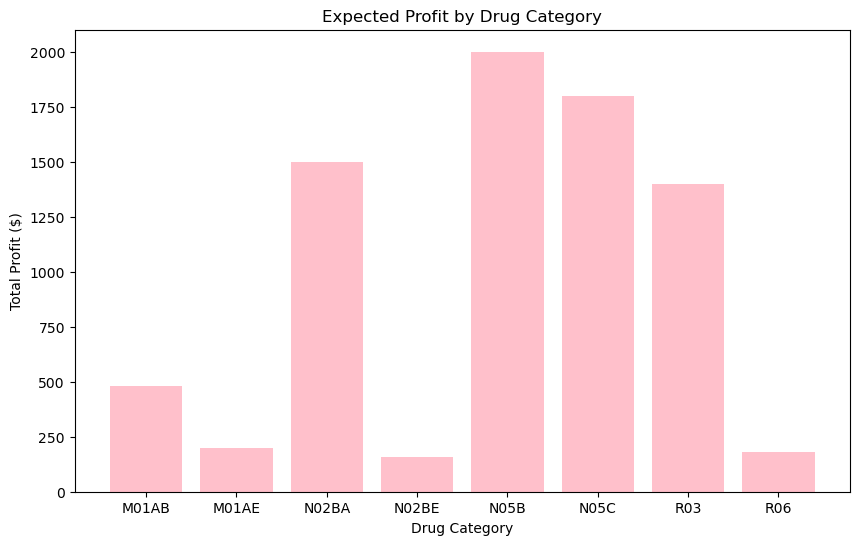

In [23]:
plt.figure(figsize=(10, 6))
plt.bar(results_df['Category'], results_df['Total_Profit'], color='pink')
plt.title('Expected Profit by Drug Category')
plt.xlabel('Drug Category')
plt.ylabel('Total Profit ($)')
plt.show()